# Medical Insurance - Charge Cost Prediction


### The features are:

- sex

- bmi: Body mass index (generally 18.5 to 24.9 for normal people)

- children:

- smoker: Is the person a smoker

- region: northwest, southeast, southwest 

- charges: Medical cost (target)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('insurance.csv')

### Data analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
region_dummies = pd.get_dummies(df['region'], drop_first=True)
region_dummies.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [8]:
df = pd.concat([df, region_dummies], axis=1)

In [9]:
df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1


In [10]:
df.drop(['region'],axis=1, inplace=True)

In [11]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


<AxesSubplot:>

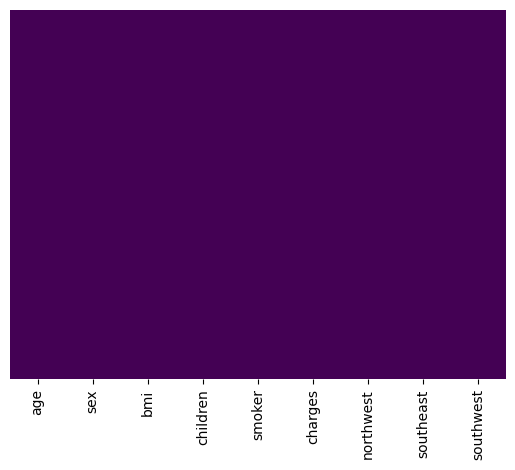

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #to check null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(2), uint8(3)
memory usage: 66.8+ KB


## Data Visualization

<AxesSubplot:xlabel='age', ylabel='Count'>

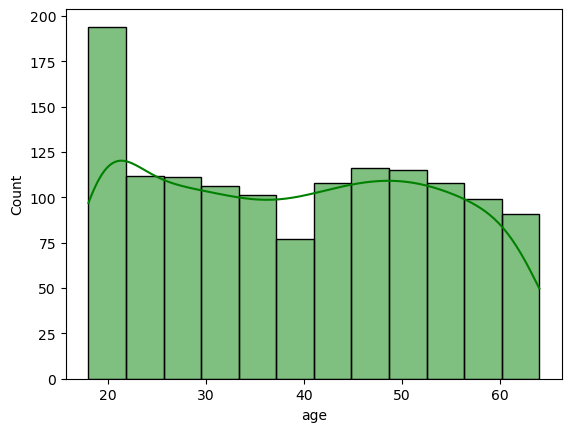

In [66]:
sns.histplot(x='age',data=df,kde=True,color='green')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

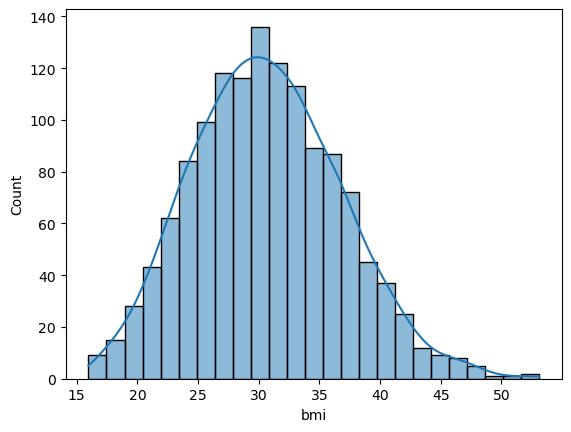

In [63]:
sns.histplot(x='bmi',data=df,kde=True)

Let us check the relationship between age and charges

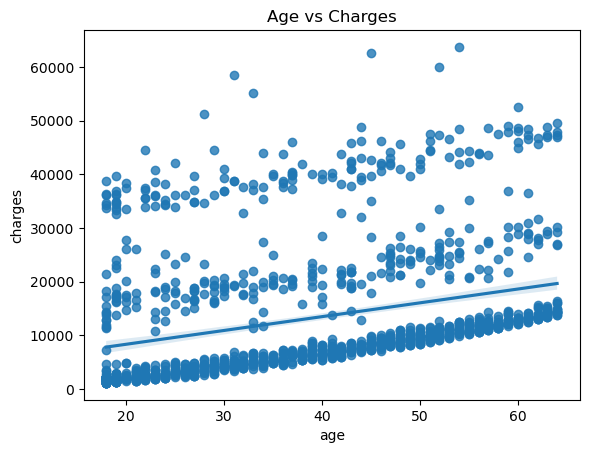

In [15]:
sns.regplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

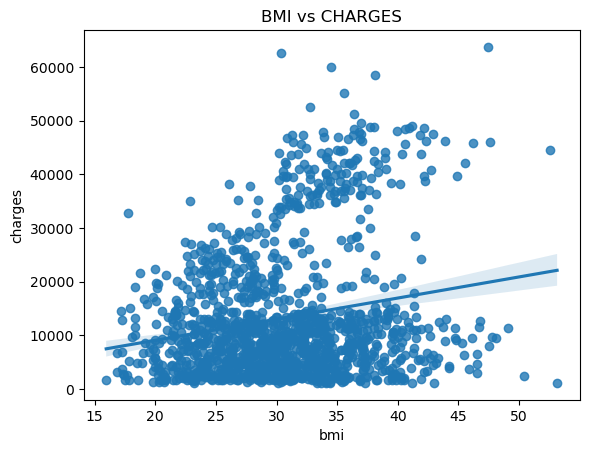

In [16]:
sns.regplot(x='bmi', y='charges', data=df)
plt.title('BMI vs CHARGES')
plt.show()

#### Encoding the categorical values

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

In [19]:
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

In [20]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


**Let us check the correlation between different attriubtes of the data**

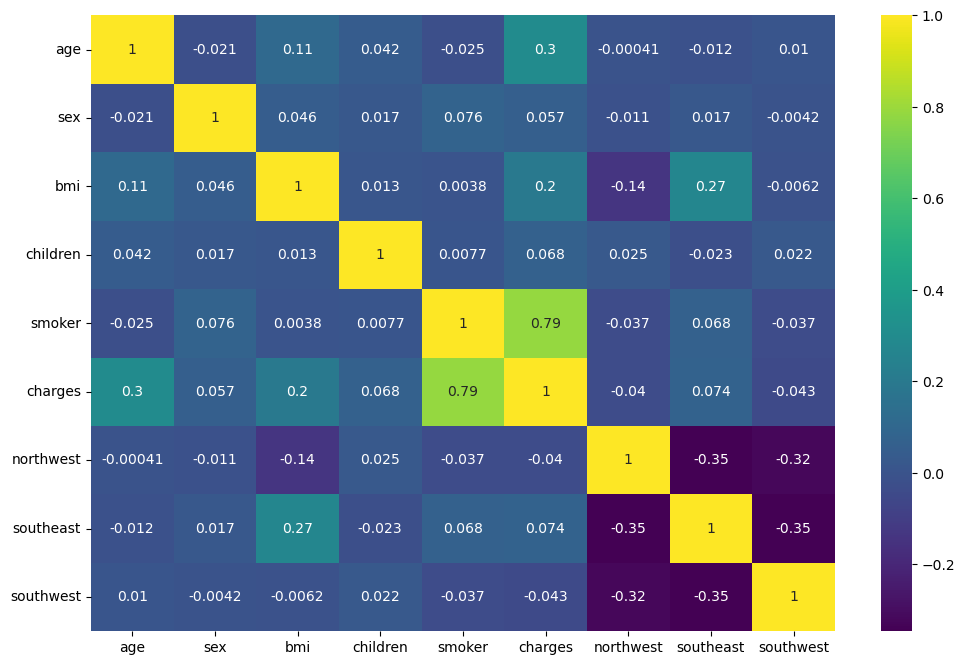

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

**From the above correlation matrix heatmap, we can deduce that 'smoker' feature has the highest correlation with the 'charges' feature, which is the target class.**

### Distrubtion of charges between smokers and non-smokers

Text(0.5, 1.0, 'Distribution of charges - not a smoker')

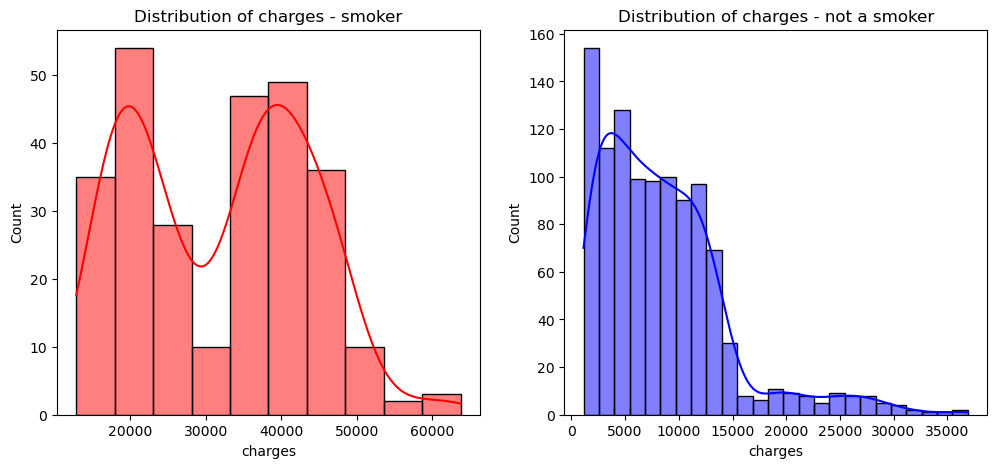

In [22]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(df[(df.smoker==1)]['charges'], color='red',ax=ax,kde=True)
ax.set_title('Distribution of charges - smoker')

ax = f.add_subplot(122)
sns.histplot(df[(df.smoker==0)]['charges'],color='blue',ax=ax,kde=True)
ax.set_title('Distribution of charges - not a smoker')

**Let us check the no of smokers and non-smokers**

<AxesSubplot:xlabel='smoker', ylabel='count'>

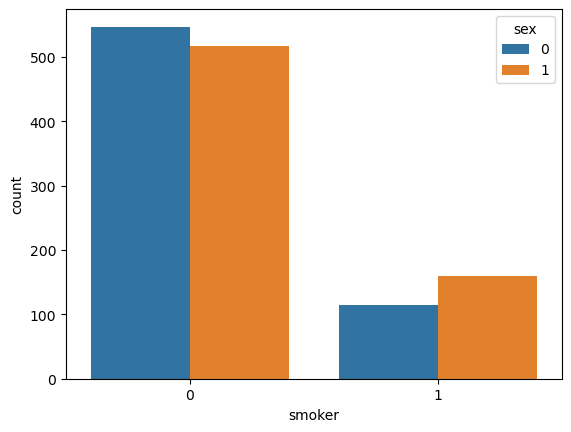

In [23]:
sns.countplot(x='smoker',hue='sex',data=df)

Text(0.5, 0, 'Sex (0-Female; 1-Male)')

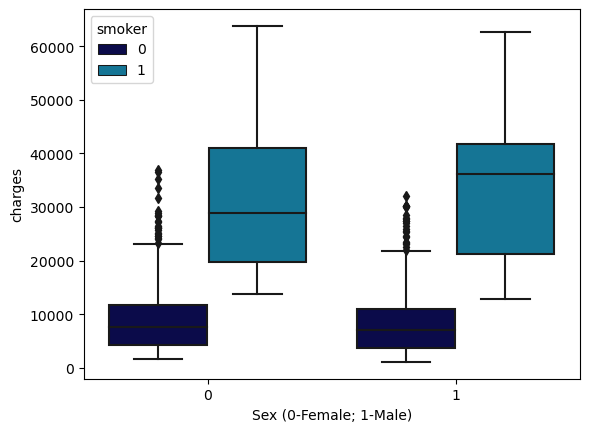

In [24]:
sns.boxplot(x="sex", y="charges", hue="smoker", data=df, palette = 'ocean')
plt.xlabel('Sex (0-Female; 1-Male)')

Smoke have the most positive relationship with the charges

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

<AxesSubplot:title={'center':'Distribution of age'}, xlabel='age', ylabel='Count'>

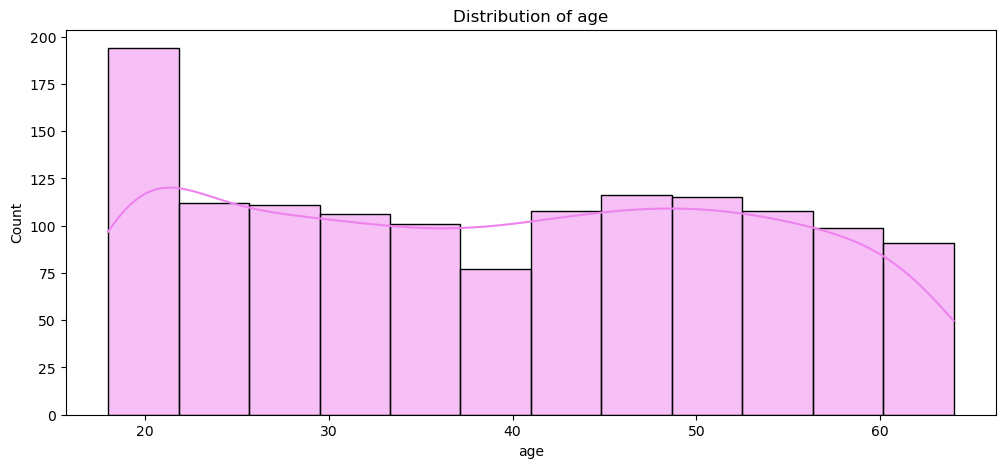

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
sns.histplot(df['age'],color='violet',kde=True)

Text(0.5, 1.0, 'The number of smokers and non-smokers (between 18 and 21 years old)')

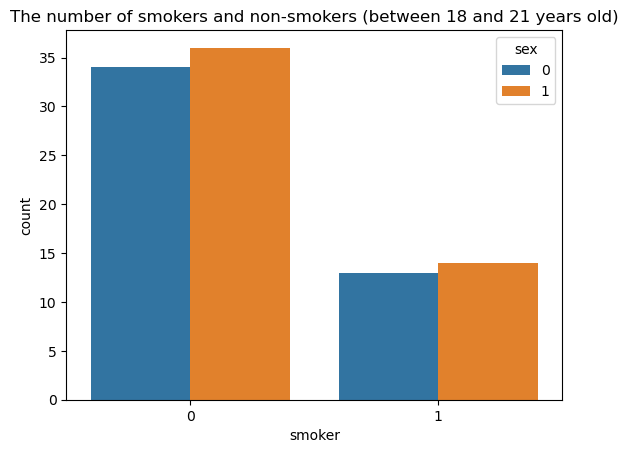

In [26]:
sns.countplot(x='smoker',hue='sex',data=df[(df['age']>18) & (df['age']<21)])
plt.title("The number of smokers and non-smokers (between 18 and 21 years old)")

For 18 years old, let's check the treatment cost of this age.

<AxesSubplot:title={'center':'Box plot for charges - smokers between 18 and 21 yrs old'}, xlabel='charges', ylabel='smoker'>

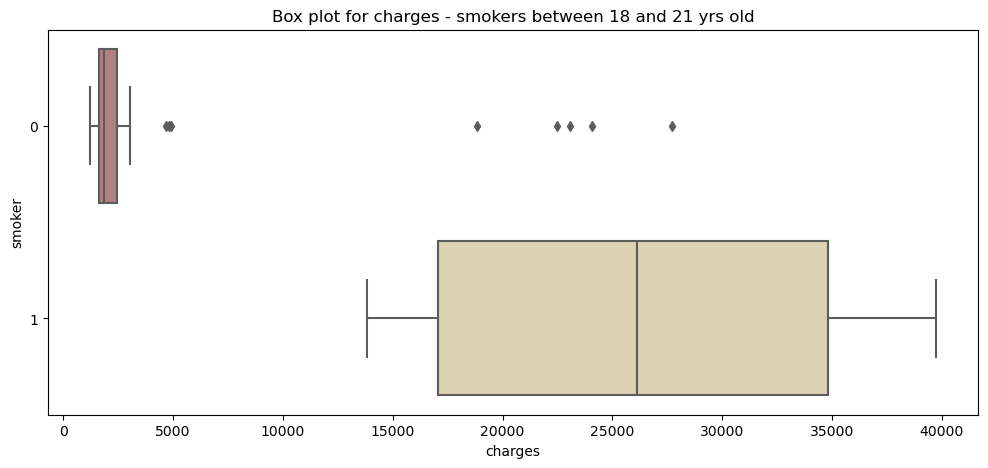

In [27]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges - smokers between 18 and 21 yrs old")
sns.boxplot(y='smoker', x='charges', data=df[(df.age > 18) & (df.age<21)],orient='h',palette='pink')

From above insight we can say that at the age of 18 smokers spend much more on treatment than non-smokers. Also non-smokers are seeing some "tails". I can assume that this is due to serious disease or accidents.

**From the above graph we can see that smokers between the age of 18 and 20 tend to spend more on medical insurance than non-smokers.**

**Let's check the no of children**

<AxesSubplot:xlabel='children', ylabel='count'>

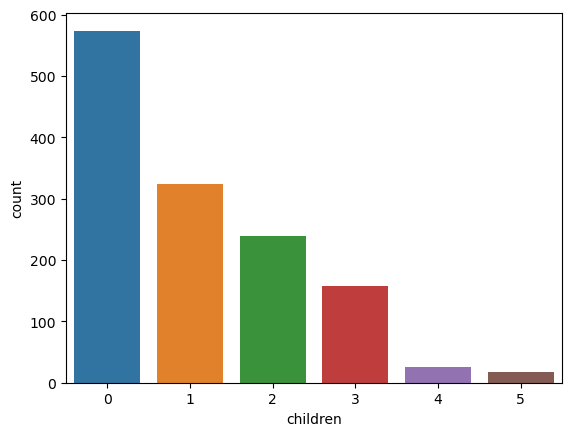

In [28]:
sns.countplot(x="children",data=df)

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

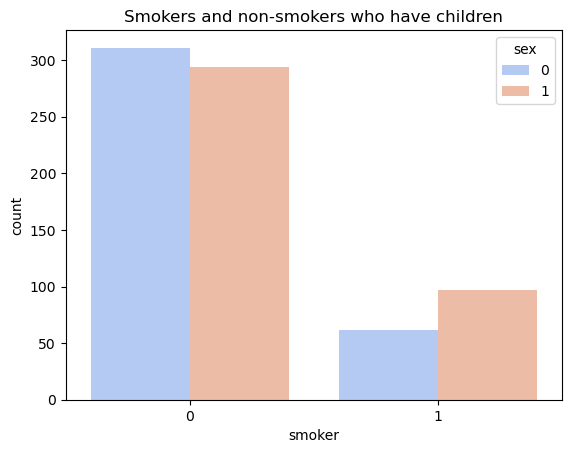

In [29]:
sns.countplot(x="smoker", palette="coolwarm",hue="sex",data=df[(df.children > 0)])
plt.title("Smokers and non-smokers who have children")

**Smokers here have lesser children than non-smoker. A cause to worry!**

### Now let's check about BMI

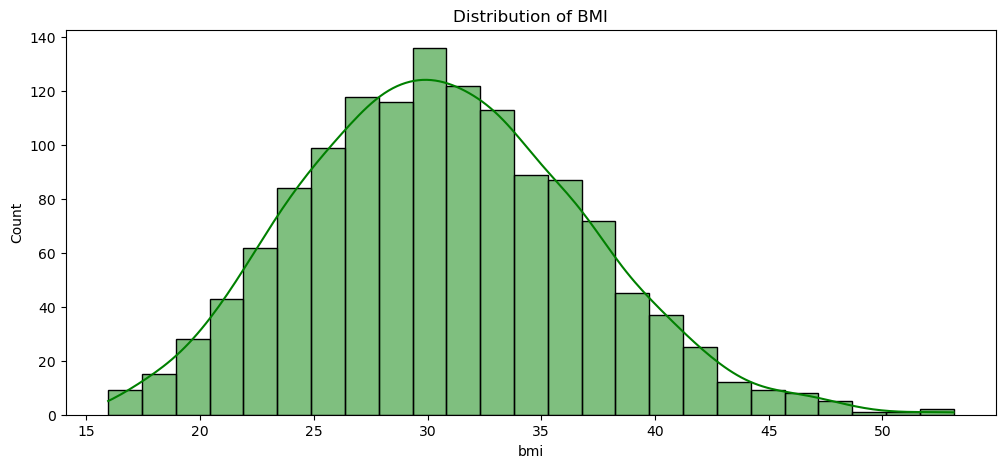

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.histplot(df['bmi'],color="green",kde=True)

The average BMI in patients is 30. 

### BMI range

BMI ----> Weight status

below 18.5 ----> Underweight

18.5 - 24.9 ----> Normal Weight

25.0 - 29.9 ----> Overweight

30.0 - 34.9 ----> Obeisty Class I

35.0 - 39.9 ----> Obesity Class II

Above 40 ----> Obesity Class III

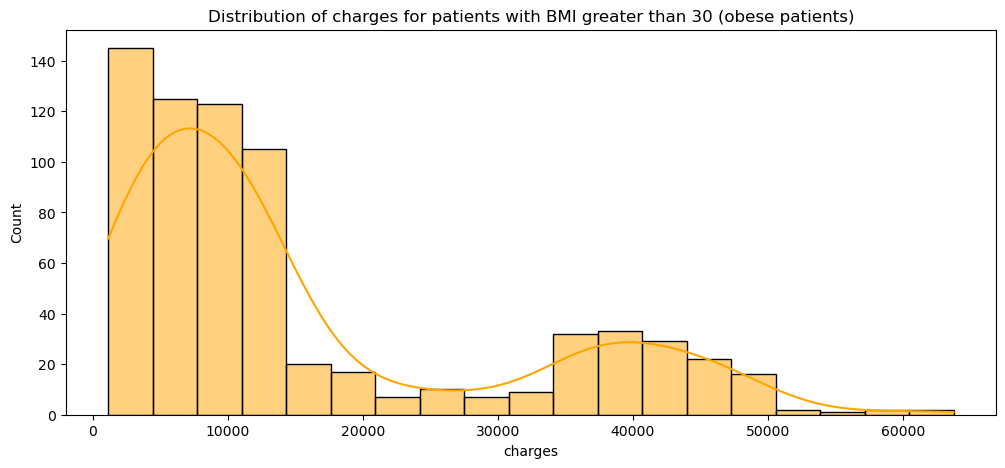

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30 (obese patients)")
ax = sns.histplot(df[(df.bmi >= 30)]['charges'], color = 'orange', kde=True)

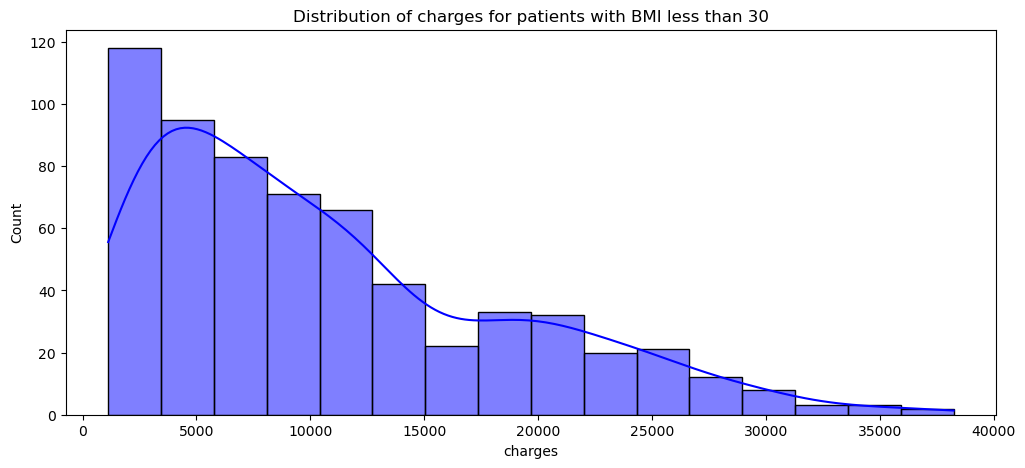

In [32]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(df[(df.bmi<30)]['charges'], color='b', kde=True)

#### Patients with BMI above 30 spend more on treatment

### Splitting the data into training and tesring 

In [33]:
X = df.drop(['charges'],axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [34]:
X_train

,age,sex,bmi,children,smoker,northwest,southeast,southwest
621,37,1,34.100,4,1,0,0,1
194,18,1,34.430,0,0,0,1,0
240,23,0,36.670,2,1,0,0,0
1168,32,1,35.200,2,0,0,0,1
1192,58,0,32.395,1,0,0,0,0
...,...,...,...,...,...,...,...,...
763,27,1,26.030,0,0,0,0,0
835,42,1,35.970,2,0,0,1,0
1216,40,1,25.080,0,0,0,1,0
559,19,1,35.530,0,0,1,0,0


In [35]:
X_test

,age,sex,bmi,children,smoker,northwest,southeast,southwest
578,52,1,30.200,1,0,0,0,1
610,47,0,29.370,1,0,0,1,0
569,48,1,40.565,2,1,1,0,0
1034,61,1,38.380,0,0,1,0,0
198,51,0,18.050,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1084,62,0,30.495,2,0,1,0,0
726,41,1,28.405,1,0,1,0,0
1132,57,1,40.280,0,0,0,0,0
725,30,0,39.050,3,1,0,1,0


## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [4,5,6,7,8],
    "max_features": ["auto", "sqrt", "log2"],
    'random_state': [0,1,42]
}

In [37]:
# RandomizedSearchCV 
cv_random = RandomizedSearchCV(rfr, param_grid, cv=5)
cv_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [38]:
cv_random.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'max_features': 'auto',
 'max_depth': 5}

In [39]:
rf = RandomForestRegressor(n_estimators=200, max_features='auto', max_depth=4,random_state=0)

## XGBoost Regressor

In [40]:
from xgboost import XGBRegressor

xgbR = XGBRegressor()

xgb_params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 6, 8, 10],
    'min_child_weight' : [2,4,10,12]
}

In [41]:
# GridSearchCV
gridcv = GridSearchCV(xgbR, xgb_params, cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...n=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
   

In [42]:
gridcv.best_params_

{'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 100}

In [43]:
xgb = XGBRegressor(max_depth=4, min_child_weight=10, n_estimators=100)

## Performance of the model

In [44]:
print("Random Forest Regressor:\n")
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

Random Forest Regressor:

0.8970886858734664


In [45]:
print("XGBoost Regressor:\n")
xgb.fit(X_train, y_train)
print(xgb.score(X_test, y_test))

XGBoost Regressor:

0.8821278713659225


#### We see that Random forest regressor has a better score

### Evaluating Model with Random Forest Regressor

In [46]:
rf_test_pred = rf.predict(X_test)

print("MSE test data: %.3f"%mean_squared_error(y_test, rf_test_pred))
print("R2 test data: %.3f"%r2_score(y_test, rf_test_pred))

MSE test data: 16376273.539
R2 test data: 0.897


### Creating user interface

In [47]:
import gradio as gr

In [48]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [52]:
def pred(age,sex,bmi,children,smoker,region):
    nw1=0
    se1=0
    sw1=0
    gender=0
    smoke=0
    if region=='northwest':
        nw1=1
    elif region=='southeast':
        se1=1
    elif region=='southwest':
        sw1=1
    if sex=='Female':
        gender=1
    else:
        gender=0
    if smoker=='Yes':
        smoke=1
    else:
        smoke=0
    feat = np.array([age,gender,bmi,children,smoke,nw1,se1,sw1])
    prediction = rf.predict(feat.reshape(1,-1))
    return prediction[0]

In [53]:
interface = gr.Interface(fn=pred,inputs=[gr.Number(label='Age'),
                                    gr.Radio(label='Sex',choices=['Female','Male']),
                                    gr.Number(label='BMI'),
                                    gr.Number(label='children'),
                                    gr.Radio(label='smoker',choices=['Yes','No']),
                                    gr.Dropdown(['northwest','southeast','southwest'],label='region')],
                        outputs=gr.Label(num_top_classes=1),title='Medical Insurance Predictor',
                         description='Predict medical insurance cost. Enter the required details below')
# demo = gr.Blocks()

# with demo:
#     gr.Markdown(
#         """
#     ## Predict the medical insurance costs on the go!
#     Enter the required details.
#     """
#     )
#     inputs = [gr.Number(label='Age'),
#               gr.Radio(label='Sex',choices=[1,0]),
#               gr.Number(label='BMI'),
#               gr.Number(label='children'),
#               gr.Radio(label='smoker',choices=[1,0]),
#               gr.Dropdown(['northwest','southeast','southwest'],label='region')]
#     output = gr.Label(num_top_classes=1)

#     inputs.change(fn=show_text, inputs=inputs, outputs=output, show_progress = True, status_tracker = None)

In [54]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://7e1003a0a57747074b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


C:\Users\farde\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
